# Import libraries and dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
%matplotlib inline

In [4]:
path = r'/Users/zoipisourika/Desktop/Career Foundry/Data Immersion/Achievement 6/Data'

In [7]:
df = pd.read_csv(os.path.join(path, 'Prepared Data','boat_data_clean.csv')) 
df.head() 

,Unnamed: 0,Boat Type,Manufacturer,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City,New or Used,Engine Type
0,0,Motor Yacht,Rigiflex power boats,2017,4.00,1.90,Unknown,226,3370,Switzerland,Lake Geneva,new boat from stock,Unknown
1,1,Center console boat,Terhi power boats,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt,new boat from stock,Unknown
2,2,Sport Boat,Marine power boats,2007,3.69,1.42,Aluminium,124,3807,Switzerland,Lake of Zurich,new boat from stock,Unknown
3,3,Sport Boat,Pioner power boats,2020,3.00,1.00,Unknown,64,3367,Denmark,Svendborg,new boat from stock,Unknown
4,4,Fishing Boat,Linder power boats,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern,new boat from stock,Unknown


In [10]:
df = df.drop(columns = ['Unnamed: 0']) # drop index column
df.head()

,Boat Type,Manufacturer,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City,New or Used,Engine Type
0,Motor Yacht,Rigiflex power boats,2017,4.00,1.90,Unknown,226,3370,Switzerland,Lake Geneva,new boat from stock,Unknown
1,Center console boat,Terhi power boats,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt,new boat from stock,Unknown
2,Sport Boat,Marine power boats,2007,3.69,1.42,Aluminium,124,3807,Switzerland,Lake of Zurich,new boat from stock,Unknown
3,Sport Boat,Pioner power boats,2020,3.00,1.00,Unknown,64,3367,Denmark,Svendborg,new boat from stock,Unknown
4,Fishing Boat,Linder power boats,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern,new boat from stock,Unknown


In [13]:
df_dups = df[df.duplicated()]
df_dups.shape # no duplicates

(0, 12)

In [15]:
df.rename(columns = {'Number of views last 7 days': 'Views'},inplace=True) #rename column

# Exploring relationships

## Correlations

In [16]:
# Create a correlation matrix using pandas

df.corr()

,Year Built,Length,Width,Views,EUR_price
Year Built,1.000000,-0.200945,-0.105177,-0.113256,0.098554
Length,-0.200945,1.000000,0.871106,-0.135047,0.562795
Width,-0.105177,0.871106,1.000000,-0.157356,0.517465
Views,-0.113256,-0.135047,-0.157356,1.000000,-0.008474
EUR_price,0.098554,0.562795,0.517465,-0.008474,1.000000


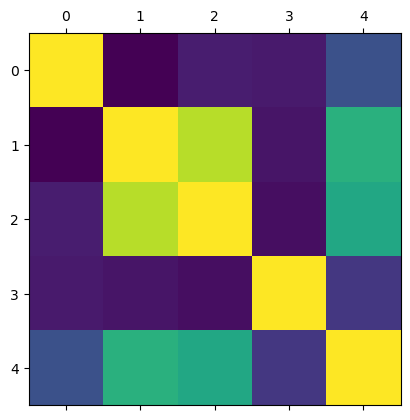

In [17]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

#### Create a correlation heatmap using seaborn:

In [19]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['Year Built', 'Length', 'Width', 'Views', 'EUR_price']]
sub

,Year Built,Length,Width,Views,EUR_price
0,2017,4.00,1.90,226,3370
1,2020,4.00,1.50,75,3490
2,2007,3.69,1.42,124,3807
3,2020,3.00,1.00,64,3367
4,2019,3.55,1.46,58,3399
...,...,...,...,...,...
9883,1987,6.30,2.44,1116,4949
9884,2007,4.17,1.68,94,4516
9885,2020,4.40,1.80,354,4499
9886,2018,4.37,1.89,266,4300


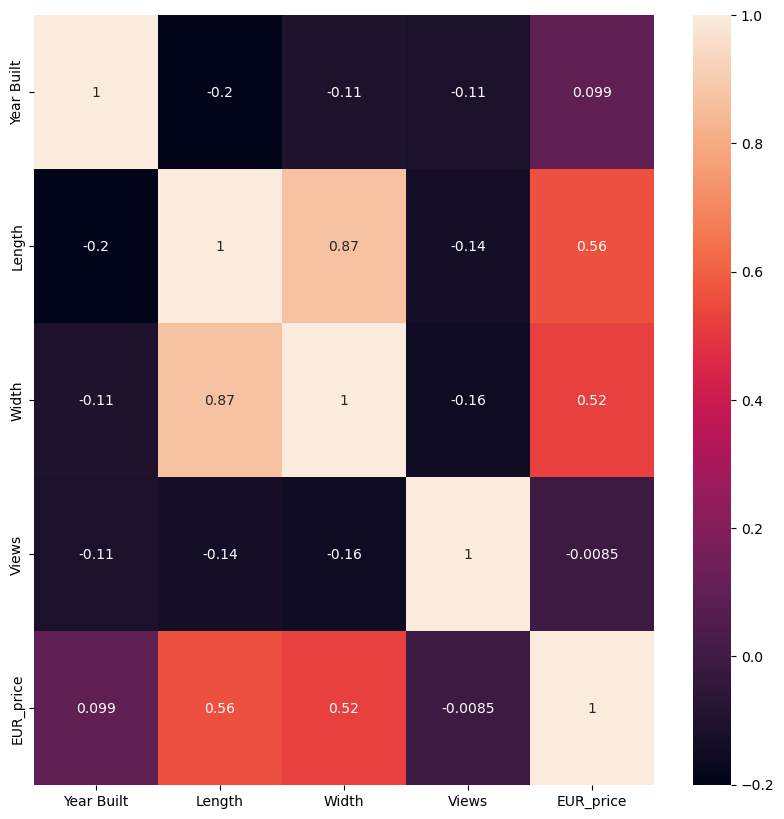

In [20]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Is the price of the boat positively correlated with its length and width?

There is a positive moderate-to-strong relationship between length and price (0.56) & width and price (0.52). Therefore, the larger boats in length and width are more likely to have higher prices.

### Is there a correlation between price and views?
There is no correlation between price and views (-0.0085), which means that views are not affected by the price of each boat.

### Is there a correlation between the size of the boat and the views?
There is a very weak negative correlation between length and views (-0.14) & between width and views (-0.16). Therefore the size of the boat may very narrowly affect the online views, with larger boats getting less views.


## Scatterplots

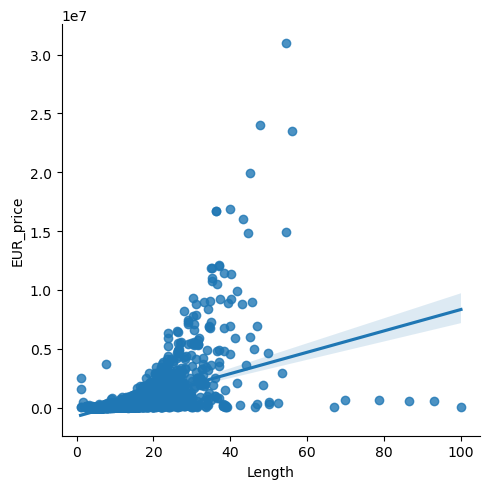

In [22]:
# Create a scatterplot for the length and price
sns.lmplot(x = 'Length', y = 'EUR_price', data = df)

There is a lot of variation in this relationship and the longer the boat is the weakest the correlation becomes. 

There are multiple outliers with the most obvious ones above the price of 1.5 and above the lenght of 60 metres.

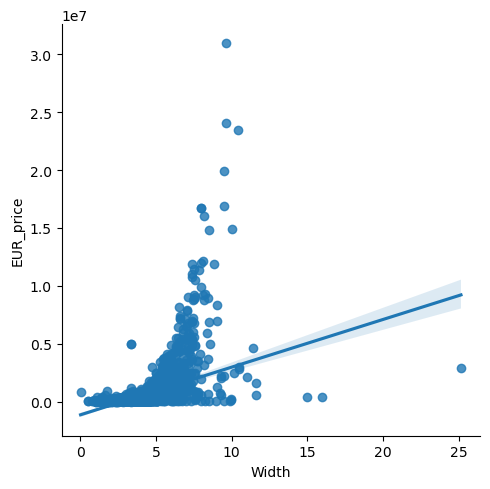

In [23]:
# Create a scatterplot for the width and price

sns.lmplot(x = 'Width', y = 'EUR_price', data = df)

Very similar relationship with that of length. The strongest relationship is for cheaper and smaller boats here again. 

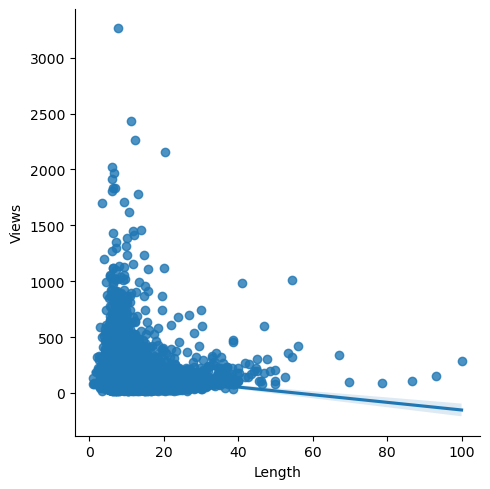

In [24]:
# Create a scatterplot for the length and price
sns.lmplot(x = 'Length', y = 'Views', data = df)

Interestingly, the relationship is not linear especially for the very long boats for which the views seem to actually go up.

## Pair Plots

In [25]:
# Keep only relevant variables

sub2 = df[['Boat Type', 'Manufacturer', 'Year Built','Material', 'Views', 'EUR_price','Country','City','New or Used', 'Engine Type']]

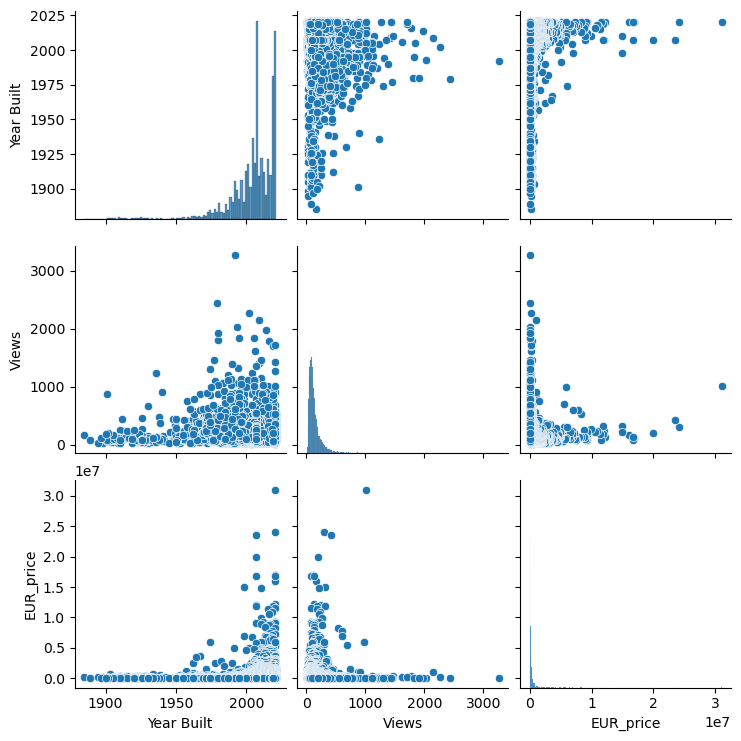

In [26]:
# Create a pair plot 

g = sns.pairplot(sub2)

### Year

Although the range of the years that the available boats have been made is wide (from the 19th cantury), most boats on the website are newly manufactured, after 2000.

### Views

Most views are concentrated in the cheaper boats, but since there is no correlation we can potentially assume that most boats on the website are priced between 0-100 euros. 

### Price

Indeed, the price of most boats on the website is close to zero in the graph. Interestingly, the most expensive boats seem to be the newly manufactured ones and not the older ones. 

### Explore further:

- The relationship between the year of manufacture and the price
- The relationship between the year of manufacture and the number of views

## Categorical Plots

<AxesSubplot:xlabel='Views', ylabel='Count'>

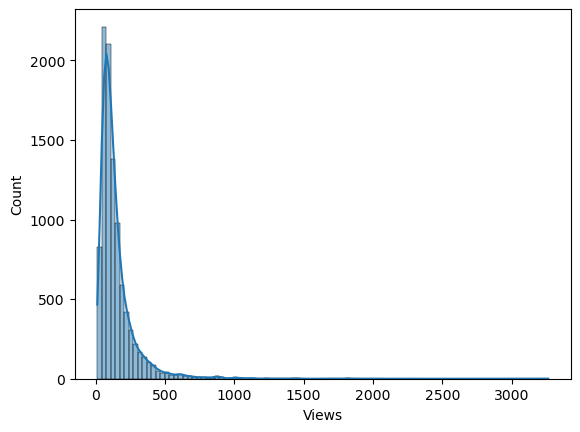

In [33]:
# Use a histogram to visualise the distribution of the views variable. 
sns.histplot(df['Views'], bins = 100, kde = True)

In [59]:
display(df['Views'].quantile([0.25, 0.50, 0.75])) # Understanding the distribution better
df['Views'].max()

0.25     70.0
0.50    108.0
0.75    172.0
Name: Views, dtype: float64

3263

In [62]:
df.loc[df['Views'] < 70, 'Views category'] = 'Low-range views'

In [63]:
df.loc[(df['Views'] >= 70) & (df['Views'] < 172), 'Views category'] = 'Middle-range views'

In [64]:
df.loc[df['Views'] > 172, 'Views category'] = 'Upper-range views'

In [65]:
df['Views category'].value_counts(dropna = False)

Middle-range views    5000
Upper-range views     2446
Low-range views       2442
Name: Views category, dtype: int64

<AxesSubplot:xlabel='EUR_price', ylabel='Count'>

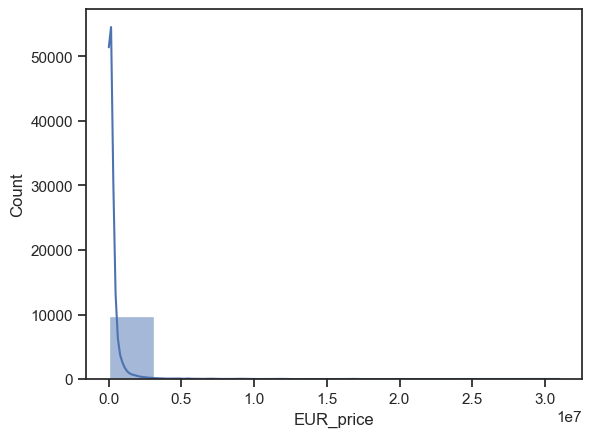

In [51]:
sns.histplot(df['EUR_price'], bins = 10, kde = True) #Price distribution

In [53]:
display(df['EUR_price'].quantile([0.25, 0.50, 0.75])) # Understanding the distribution better
df['EUR_price'].max()

0.25     42997.5
0.50     92536.0
0.75    248000.0
Name: EUR_price, dtype: float64

31000000

In [54]:
# Creating another label column for prices

df.loc[df['EUR_price'] < 42997.5, 'Price Category'] = 'Cheap'

In [55]:
df.loc[(df['EUR_price'] >= 42997.5) & (df['EUR_price'] < 248000), 'Price Category'] = 'Medium'

In [56]:
df.loc[df['EUR_price'] > 248000, 'Price Category'] = 'Expensive'

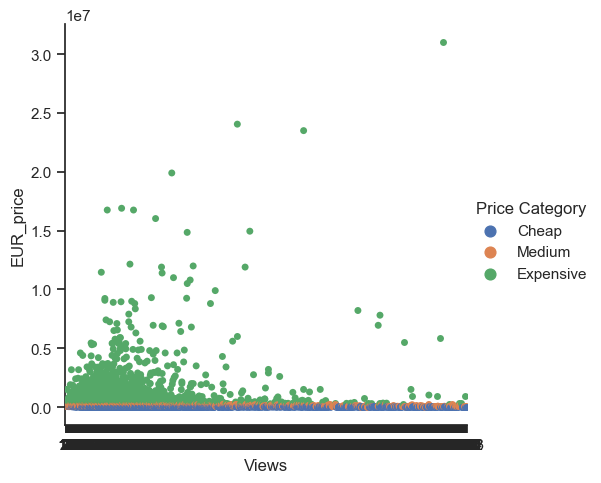

In [58]:
sns.set(style="ticks")
g = sns.catplot(x="Views", y="EUR_price", hue="Price Category", data=df)

Most of the expensive boats have received disproportionately less views than cheap and medium priced boats.

## Hypotheses:

- The larger the boat the pricier it will be.
- The price of the boat does not affect the number of views.
- For boats less than 60 metres long, the longer the boat the less views it has. 
- Cheap and medium priced boats receive more views than expensive boats.
